# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# Your work here.

In [29]:
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

C:\Users\Aditya\Miniconda2\envs\py3k\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


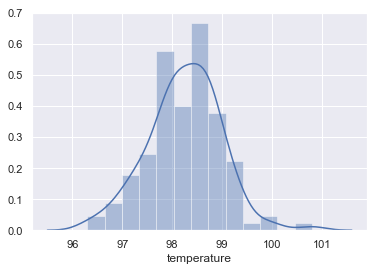

In [6]:
sns.distplot(df['temperature'])

**From the normalized histogram plot above, it doesn't appear to be normally distributed. The seaborn plot here tries to fit a smooth curve but we can observe that the observations are slightly skewed to the left.**

**Let us do a normal distribution test for temperature using the stats module which is part of the scipy package.**

In [7]:
scipy.stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

**From the p-values above which is ~0.26, we cannot reject the null hypothesis (in this case) that the distribution isn't normal.**

**2.**

In [51]:
len(df)

130

**There are a total of 130 observations. Since this is a sample set from a large population, we can conclude that the results of this data set are independendent and suitable for analysis. Besdies, this sample set is less than 10% of the total population. Morevoer, we would need at least 30 observations to satisfy normal conditions when carrying out tests for a statistic of the sample distribution. So yes, this sample size is large enough**

**3**

In [9]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [10]:
#Function to calculate bootstrap replicates.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

The mean of the temperature in the data is given below.

In [116]:
np.mean(df['temperature']) 

98.24923076923078

We no go ahead and compute the bootstrap replicates 

In [12]:
new_bs_reps = draw_bs_reps(df['temperature'], np.mean, size=10000)

Next, we calculate the standard error of the mean.

In [13]:
t,p = scipy.stats.ttest_1samp(new_bs_reps, 98.6)

In [22]:
t

-552.350475179866

In [14]:
p

0.0

**Using the 1-sample t-test, we got a p-value of 0. Which implies statistical significance and that we can reject the null hypothesis. Next, let us calculate the confidence interval.**

In [21]:
stats.norm.interval(0.95, loc=new_bs_reps.mean(), scale=new_bs_reps.std())

(98.12397015475938, 98.37331092216368)

**From the above confidence interval calculated using the bootstrap replicates sample, the expected value of 98.6 doesn't lie in the 95% confidence interval. Hence, the mean of the sample population is not 98.6**

Intuitively, I would go with the one-sample test. It is because we don't have two datasets. For drawing comparisons between two datasets, I would use the 2 sample test

We will now carry out a one sample hypothesis test and see if we arriv at the same conclusion.

Below, we are shifting the data as per the expected mean of the entire population.

In [89]:
translated_mean_temp = df['temperature'] - df['temperature'].mean() + 98.6

Drawing bootstrap replicates of the shifted data

In [90]:
translated_bs_replicates = draw_bs_reps(translated_mean_temp, np.mean, 10000)

We now calculate the p-value.

In [93]:
p = np.sum(translated_bs_replicates <= np.mean(df['temperature'])) / 10000

In [94]:
p

0.0

Based on the above p-value, we can reject the nul hypothesis that the given population mean for temperature is 98.6. The p-value of 0 suggests that we need a sample much larger than 10000 to even values that support the null hypothesis.

Since we know the actual value of the parameter of the entire population, which is the mean, we must use the z-test. The t-test is more suitable when we do not have knowledge of the parameter of the population beforehand.

**4.**

In [55]:
np.random.seed(42)

In [56]:
new_bs_replicates = np.random.choice(df['temperature'], 10)

In [57]:
z, p = ztest(new_bs_replicates, value = 98.6)

In [58]:
z

-3.0934479202257976

In [59]:
p

0.0019784527476214603

**We get a p-value of 0.405 which means that we cannot reject our null hypothesis.**

In [60]:
t,p = scipy.stats.ttest_1samp(new_bs_replicates, 98.6)

In [61]:
t

-3.0934479202257976

In [62]:
p

0.012857704604809363

We got a smaller value for the p-value of the z-statistic than the t-value. Although both of them signify statistical difference, the difference is huge in relative terms. If we used the z-statistic alone and not considered the t-statistic, we may have automatically implied without any second thoughts, we would have reject the null hypothesis right away. But a test for the t-value is much closer to alpha (our significance level of 0.05). For smaller values of n, the conditions of normalcy may not apply. We need a values of n>=30 for normalcy as per the central limit theorem.

Hence, we must always generate multiple samples with largers sizes to avpid false positives.

In [156]:
z = (np.mean(translated_bs_replicates) - np.mean(df['temperature'])) / np.std(translated_bs_replicates)

In [157]:
z

1.5121981108468432

Our p-value is approximately 0.068 which also signifies statistical insignificance

Assuming that our significant threshold has been set to 5%, we cannot reject the null hypothesis based on the values we acquired.

**5.**

Considering our 5% significance threshold, we will calculate the 95% confidence interval. Values outside of these intervales could be considered "abnormal". In other words, values outside this interval will have a p-value of less than 0.05

The 95% confidence interval has been calculated below:

In [122]:
np.percentile(new_bs_reps, [2.5,97.5])

array([98.12230769, 98.37307692])

**Values outside the aboverange could be considered abnormal.**

**6.**

In [143]:
df_males = df.loc[df.gender == 'M']

In [144]:
df_females = df.loc[df.gender == 'F']

In [145]:
male_temp_shifted = df_males['temperature'] - df_males['temperature'].mean() + df['temperature'].mean()

In [146]:
female_temp_shifted = df_females['temperature'] - df_females['temperature'].mean() + df['temperature'].mean()

In [147]:
bs_reps_males = draw_bs_reps(male_temp_shifted , np.mean, size=10000)

In [148]:
bs_reps_females = draw_bs_reps(female_temp_shifted , np.mean, size=10000)

In [149]:
bs_reps_diff = bs_reps_females - bs_reps_males

In [141]:
p = np.sum(bs_reps_diff >= (df_females['temperature'].mean() - df_males['temperature'].mean())) / len(bs_reps_diff)

In [142]:
p

0.012

The small p-value suggests that there is a significant difference in temperatures between males and females. We can reject the null hypothesis.

The 2 sample test was chosen over the one sample test. This is because the 1 sample test is impossible to do with permutation. A permutation test is more accurate.